In [0]:
#Description: This is a sentiment analysis machine learning model that parses the tweets fetched from twitter using Python.

In [2]:
!pip install twitter
# import the libraries
import twitter
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')   

In [0]:
# Twitter API credentials
consumer_key = "xxx" 
consumer_secret = "xxx"
access_key = "xxx"
access_secret = "xxx"

In [0]:
# # Function to extract tweets 
# def get_tweets(username): 
          
#         # Authorization to consumer key and consumer secret 
#         auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
#         # Access to user's access key and access secret 
#         auth.set_access_token(access_key, access_secret) 
  
#         # Calling api 
#         api = tweepy.API(auth) 
  
#         # 200 tweets to be extracted 
#         number_of_tweets=200
#         tweets = api.user_timeline(screen_name=username) 
  
#         # Empty Array 
#         tmp=[]  
  
#         # create array of tweet information: username,  
#         # tweet id, date/time, text 
#         tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created  
#         for j in tweets_for_csv: 
  
#             # Appending tweets to the empty array tmp 
#             tmp.append(j)  
  
#         # Printing the tweets 
#         print(tmp[:5])

# get_tweets("narendramodi")

In [0]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Set the access token and access token secret
authenticate.set_access_token(access_key, access_secret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate)

In [6]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = 'narendramodi', count = 500, lang = "en", tweet_mode = "extended")

# Print last 5 tweets from the account
print("Show 5 recent tweets:\n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i += 1

Show 5 recent tweets:

1) Always better to take that extra precaution. Will help you and those around you.

I commend the @timesofindia group for this very innovative movement. #IndiaFightsCorona https://t.co/vB8twfbyii

2) Outstanding gesture by the @DalmiaBharat Group. Every contribution matters and will lead to a healthier India. #IndiaFightsCorona https://t.co/rZ8R4XpACz

3) I appreciate the Zee Group for contributing to PM-CARES. This will make our fight against COVID-19 even stronger. #IndiaFightsCorona https://t.co/TDA4BuvHWr

4) फिर मुस्कुराएगा इंडिया...

फिर जीत जाएगा इंडिया...

India will fight. India will win! 

Good initiative by our film fraternity. 

https://t.co/utUGm9ObhI

5) This #WorldHealthDay, let us also ensure we follow practices like social distancing which will protect our own lives as well as the lives of others. May this day also inspire us towards focusing on personal fitness through the year, which would help improve our overall health.



In [7]:
# Create dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,Always better to take that extra precaution. W...
1,Outstanding gesture by the @DalmiaBharat Group...
2,I appreciate the Zee Group for contributing to...
3,फिर मुस्कुराएगा इंडिया...\n\nफिर जीत जाएगा इंड...
4,"This #WorldHealthDay, let us also ensure we fo..."


In [0]:
# Clean the text

# Create a function to clean the text
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove mentions
  text = re.sub(r'#', '', text) #Remove hashtags
  text = re.sub(r'RT[\s]+', '', text) #Remove retweets
  text = re.sub(r'https?:\/\/S+', '', text) #Remove hyperlinks
  text = re.sub(r'http?:\/\/S+', '', text) #Remove hyperlinks

  return text

In [9]:
# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanText)

# Show cleaned text
df

,Tweets
0,Always better to take that extra precaution. W...
1,Outstanding gesture by the Group. Every contr...
2,I appreciate the Zee Group for contributing to...
3,फिर मुस्कुराएगा इंडिया...\n\nफिर जीत जाएगा इंड...
4,"This WorldHealthDay, let us also ensure we fol..."
...,...
195,It is our firm resolve that the poor and vulne...
196,"Cheti Chand greetings to everyone, especially ..."
197,Trust India’s youth to show the way when it co...
198,इन माताओं का आशीर्वाद ही मेरे लिए प्रेरणा और क...


In [10]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns for Subjectivity and Polarity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show new dataframe
df

,Tweets,Subjectivity,Polarity
0,Always better to take that extra precaution. W...,0.533333,0.383333
1,Outstanding gesture by the Group. Every contr...,0.875000,0.500000
2,I appreciate the Zee Group for contributing to...,0.000000,0.000000
3,फिर मुस्कुराएगा इंडिया...\n\nफिर जीत जाएगा इंड...,0.500000,0.850000
4,"This WorldHealthDay, let us also ensure we fol...",0.341667,0.158333
...,...,...,...
195,It is our firm resolve that the poor and vulne...,0.580000,-0.230000
196,"Cheti Chand greetings to everyone, especially ...",0.592857,0.439286
197,Trust India’s youth to show the way when it co...,0.000000,0.000000
198,इन माताओं का आशीर्वाद ही मेरे लिए प्रेरणा और क...,0.000000,0.000000


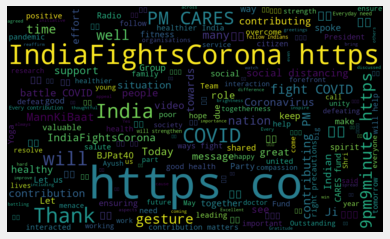

In [11]:
# Plot The word cloud 
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords) 

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [12]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Always better to take that extra precaution. W...,0.533333,0.383333,Positive
1,Outstanding gesture by the Group. Every contr...,0.875000,0.500000,Positive
2,I appreciate the Zee Group for contributing to...,0.000000,0.000000,Neutral
3,फिर मुस्कुराएगा इंडिया...\n\nफिर जीत जाएगा इंड...,0.500000,0.850000,Positive
4,"This WorldHealthDay, let us also ensure we fol...",0.341667,0.158333,Positive
...,...,...,...,...
195,It is our firm resolve that the poor and vulne...,0.580000,-0.230000,Negative
196,"Cheti Chand greetings to everyone, especially ...",0.592857,0.439286,Positive
197,Trust India’s youth to show the way when it co...,0.000000,0.000000,Neutral
198,इन माताओं का आशीर्वाद ही मेरे लिए प्रेरणा और क...,0.000000,0.000000,Neutral


In [13]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Always better to take that extra precaution. Will help you and those around you.

I commend the  group for this very innovative movement. IndiaFightsCorona https://t.co/vB8twfbyii

2) Outstanding gesture by the  Group. Every contribution matters and will lead to a healthier India. IndiaFightsCorona https://t.co/rZ8R4XpACz

3) फिर मुस्कुराएगा इंडिया...

फिर जीत जाएगा इंडिया...

India will fight. India will win! 

Good initiative by our film fraternity. 

https://t.co/utUGm9ObhI

4) This WorldHealthDay, let us also ensure we follow practices like social distancing which will protect our own lives as well as the lives of others. May this day also inspire us towards focusing on personal fitness through the year, which would help improve our overall health.

5) Today on WorldHealthDay, let us not only pray for each other’s good health and well-being but also reaffirm our gratitude towards all those doctors, nurses, medical staff and healthcare workers who are b

In [14]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Spoke to HM Hamad Bin Isa Al Khalifa, King of the Kingdom of Bahrain. We discussed the prevailing situation due to COVID-19 and how we can work together to fight the pandemic. Thanked him for the care extended by Bahrain towards the Indian diaspora there. 
https://t.co/V6HCFpSUsh

2) Greetings to all fellow  Karyakartas on the Sthapana Diwas of the Party. Tributes to all those who have toiled hard to build the Party for decades, due to which BJP has got the opportunity to serve crores of Indians across our nation’s length and breadth. BJPat40

3) Thank you  Ji. This support is extremely valuable and will further the spirit of togetherness! IndiaFightsCorona https://t.co/QSUnRLTd97

4) Spoke on phone to President of the Government of Spain, H.E. Pedro Sanchez. Conveyed my deepest condolences for the tragic loss of life in Spain.  We agreed to collaborate in fighting the pandemic. 

5) A very passionate appeal...do have a look. IndiaFightsCorona https://t.co

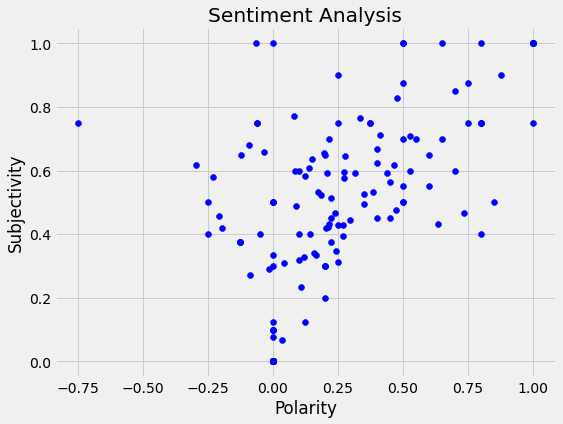

In [15]:
# Plotting
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
 plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [16]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

48.0

In [17]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

10.0

In [18]:
# Show the value counts
df['Analysis'].value_counts()

Positive    96
Neutral     84
Negative    20
Name: Analysis, dtype: int64

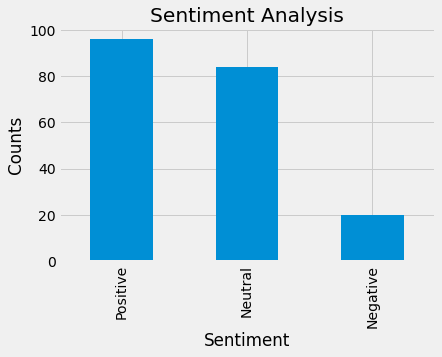

In [19]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
